**Slab Model**

Claudio Iturra, 2022.

This demonstrates a integration of the Pollard & Millard (1970) (https://doi.org/10.1016/0011-7471(70)90043-4)slab model for CS wind data (36S).

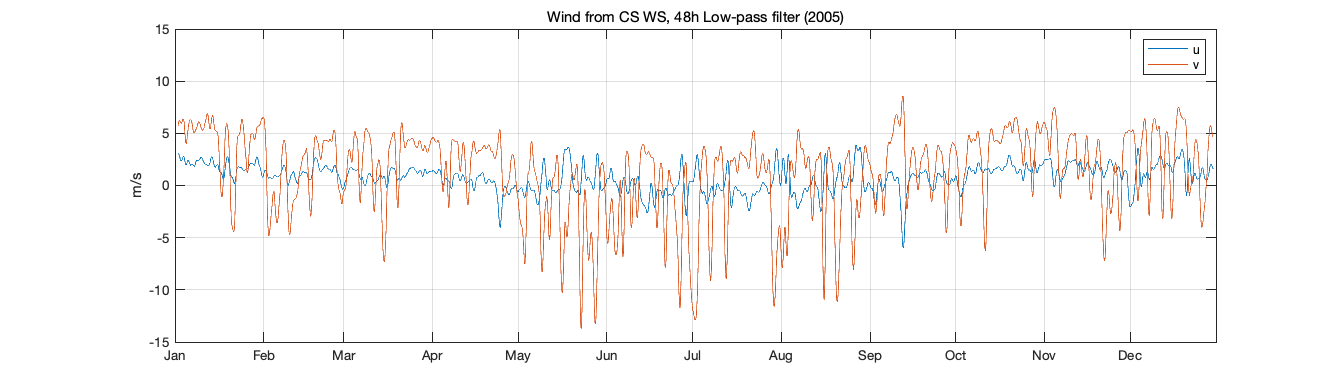

In [14]:
%% Wind from CS weather station

clear all,close all,load wind_cs.mat;
uh = inpaint_nans(uh);,uh = uh(find(time == datenum(2005,1,1,0,0,0)):find(time == datenum(2005,12,31,0,0,0)));
vh = inpaint_nans(vh);,vh = vh(find(time == datenum(2005,1,1,0,0,0)):find(time == datenum(2005,12,31,0,0,0)));
time = time(find(time == datenum(2005,1,1,0,0,0)):find(time == datenum(2005,12,31,0,0,0)));

set(gcf,'paperposition',[1 1 14 4]);
uvplot(time,vfilt(complex(uh,vh),48)),xlim([datenum(2005,1,1,0,0,0) datenum(2005,12,31,0,0,0)]),legend('u','v'),ylabel('m/s');
datetick('x',3,'keeplimits'),ylim([-15 15]),grid,title('Wind from CS WS, 48h Low-pass filter (2005)','fontweight','normal');


In [15]:
time_seconds =  0:3600:(length(time)-1)*3600*24;
lat = 36.780554;
epsilon = 1.0 / 3600 / 24 / 5; % 5 days decay time scale
%H = repmat(20,length(uh),1); % meters
H = 20; % meters
uh = uh;
vh = vh;

u0 = zeros(2, 1);
v0 = zeros(2, 1);
dt = mean(diff(time_seconds)) / 2;

In [13]:
slab_model = pm70_func(lat, time_seconds, epsilon, H, uh, vh, u0, v0, dt);


pm70_func ...


Error using interp1>reshapeAndSortXandV (line 445)
X and V must be of the same length.

Error in interp1 (line 128)
    [X,V,orig_size_v] = reshapeAndSortXandV(X,V);

Error in duration/interp1 (line 107)
    vq = interp1(x,v,xq,method,extrapVal);

Error in pm70_func (line 31)
u10_model = interp1(uv10_seconds, squeeze(u10(:)), t, 'linear', 'extrap');



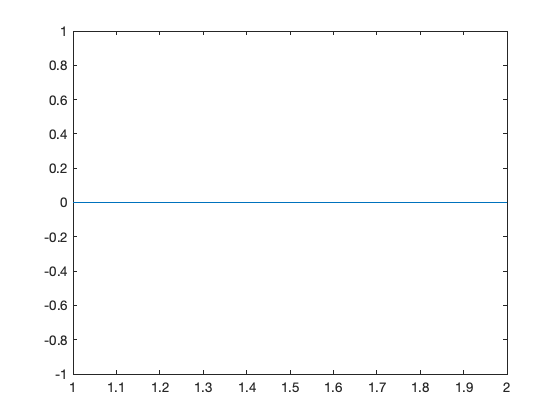

In [10]:
plot(slab_model.u);